In [1]:
%pip install -q tranqu python-json-logger
# %pip install -q git+https://github.com/softwareQinc/staq
# %pip install ouqu-tp
import os
os.environ["CHIP_ID"] = "64Q"
os.environ["CONFIG_DIR"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config"
os.environ["PARAMS_DIR"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config"
os.environ["CALIB_NOTE_PATH"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config/calib_note.json"


DEPRECATION: pylabrad 0.98.2 has a non-standard dependency specifier pyOpenSSL>=16.2.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pylabrad or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pylabrad 0.98.2 has a non-standard dependency specifier pyparsing>=2.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pylabrad or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pylabrad 0.98.2 has a non-standard dependency specifier twisted>=16.0.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pylabrad or contact the author to suggest that they release a version

## Logging set up

In [2]:
import sys
import logging
from pythonjsonlogger import jsonlogger

class QubexFilter(logging.Filter):
    def filter(self, record):
        return record.name.startswith("qubex")

logger = logging.getLogger()
logger.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)

log_format = '%(asctime)s %(name)s %(levelname)s %(message)s'
formatter = jsonlogger.JsonFormatter(log_format)
handler.setFormatter(formatter)

handler.addFilter(QubexFilter())
logger.addHandler(handler)

## Generate device information from system note

In [3]:
oqtopus_device = {"name": "anemone", "device_id": "anemone", "qubits": [{"id": 0, "physical_id": 0, "position": {"x": 0, "y": 0.666666666666667}, "fidelity": 0.9993501062484771, "meas_error": {"prob_meas1_prep0": 0.228759765625, "prob_meas0_prep1": 0.2183837890625, "readout_assignment_error": 0.22467041015625}, "qubit_lifetime": {"t1": 35.133509601698314, "t2": 33.077681752942304}, "gate_duration": {"rz": 0, "sx": 16, "x": 24}}, {"id": 1, "physical_id": 1, "position": {"x": 0.6666666666666665, "y": 0.666666666666667}, "fidelity": 0.9992679241765201, "meas_error": {"prob_meas1_prep0": 0.2181396484375, "prob_meas0_prep1": 0.2249755859375, "readout_assignment_error": 0.22772216796875}, "qubit_lifetime": {"t1": 36.648569415670615, "t2": 31.10941914156478}, "gate_duration": {"rz": 0, "sx": 16, "x": 24}}, {"id": 2, "physical_id": 2, "position": {"x": 0, "y": 0}, "fidelity": 0.9993187817021657, "meas_error": {"prob_meas1_prep0": 0.2562255859375, "prob_meas0_prep1": 0.298583984375, "readout_assignment_error": 0.2933349609375}, "qubit_lifetime": {"t1": 46.545071107244596, "t2": 29.68816414219162}, "gate_duration": {"rz": 0, "sx": 16, "x": 24}}, {"id": 3, "physical_id": 3, "position": {"x": 0.6666666666666665, "y": 0}, "fidelity": 0.9990820166340697, "meas_error": {"prob_meas1_prep0": 0.1751708984375, "prob_meas0_prep1": 0.19677734375, "readout_assignment_error": 0.20465087890625}, "qubit_lifetime": {"t1": 26.95326773686712, "t2": 21.201787040406952}, "gate_duration": {"rz": 0, "sx": 16, "x": 24}}], "couplings": [{"control": 0, "target": 1, "fidelity": 0.9617562151742569, "gate_duration": {"rzx90": 288}}, {"control": 0, "target": 2, "fidelity": 0.9786811847171124, "gate_duration": {"rzx90": 272}}, {"control": 3, "target": 1, "fidelity": 0.9712265828597454, "gate_duration": {"rzx90": 240}}, {"control": 3, "target": 2, "fidelity": 0.9877533718137459, "gate_duration": {"rzx90": 160}}], "calibrated_at": "2025-04-09 17:31:58.787554"}



In [4]:
def virtual_physical_map(device_topology_dict: dict):
	device_topology = device_topology_dict
	qubits = {
		qubit["id"]: qubit["physical_id"] for qubit in device_topology["qubits"]
	}
	couplings = {
		(c["control"], c["target"]): (qubits[c["control"]], qubits[c["target"]])
		for c in device_topology["couplings"]
	}
	return {"qubits": qubits, "couplings": couplings}

## Create virtual-physical mapping from calibration data

In [5]:
_virtual_physical_map = virtual_physical_map(oqtopus_device)
print(_virtual_physical_map)

{'qubits': {0: 0, 1: 1, 2: 2, 3: 3}, 'couplings': {(0, 1): (0, 1), (0, 2): (0, 2), (3, 1): (3, 1), (3, 2): (3, 2)}}


In [6]:
from device_gateway.backend.qubex_backend import QubexBackend
import os
os.environ["CHIP_ID"] = "64Q"
os.environ["CONFIG_DIR"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config"
os.environ["PARAMS_DIR"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config"
os.environ["CALIB_NOTE_PATH"] = "/home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config/calib_note.json"
backend = QubexBackend(virtual_physical_map=_virtual_physical_map,device_topology=oqtopus_device)


/home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


date: 2025-04-10 11:49:01
python: 3.12.3
qubex: 1.3.1+6587937
env: /home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv
config: /home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config
params: /home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config
chip: 64Q (AIST 7th #1 (2,1))
qubits: ['Q00', 'Q01', 'Q02', 'Q03']
muxes: ['MUX00']
boxes: ['U15A', 'R21B']
U15A  : Linked up
R21B  : Linked up


/home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


'state_params' updated: {'Q00': {'target': 'Q00', 'centers': {'0': [0.0020046313249300436, 0.0008885616418961834], '1': [0.0019369987598278553, -0.00018238695607787408]}, 'timestamp': '2025-04-10 11:49:07'}}


/home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


'state_params' updated: {'Q01': {'target': 'Q01', 'centers': {'0': [-0.0011165078085233569, 0.0012561839464152915], '1': [-0.00012053906709866609, 0.001530917245658465]}, 'timestamp': '2025-04-10 11:49:12'}}


/home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


'state_params' updated: {'Q02': {'target': 'Q02', 'centers': {'0': [0.001547584713025437, 0.0011590145671503222], '1': [0.0017271695390696728, 0.00032291527054385653]}, 'timestamp': '2025-04-10 11:49:17'}}


/home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  warnings.warn(


'state_params' updated: {'Q03': {'target': 'Q03', 'centers': {'0': [0.001672332509823636, -0.0008635933084656397], '1': [0.000883554773539174, -0.0016075771876518773]}, 'timestamp': '2025-04-10 11:49:22'}}


In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
# qc.cx(0, 2)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

## Transpile with Tranqu

In [8]:
from tranqu import Tranqu
options = {
    "basis_gates": [ "sx", "x", "rz", "cx"],
    "optimization_level": 1,
}

tranqu = Tranqu()
result = tranqu.transpile(
    program=qc,
    transpiler_lib="qiskit",
    program_lib="qiskit",
    transpiler_options=options,
    device=oqtopus_device,
    device_lib="oqtopus",
)
transpiled_program = result.transpiled_program
print(transpiled_program)

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐     
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──
               └─────────┘└────┘└─────────┘┌─┴─┐
      q_1 -> 1 ────────────────────────────┤ X ├
                                           └───┘
ancilla_0 -> 2 ─────────────────────────────────
                                                
ancilla_1 -> 3 ─────────────────────────────────
                                                


In [9]:
result.virtual_physical_mapping

{'qubit_mapping': {0: 0, 1: 1}, 'bit_mapping': {}}

In [10]:
measured_qubits = [value for key, value in sorted(result.virtual_physical_mapping.qubit_mapping.items())]
print(measured_qubits)

[0, 1]


In [11]:
from qiskit.qasm3 import dumps
qasm3 = dumps(transpiled_program)
print(qasm3)

OPENQASM 3.0;
include "stdgates.inc";
rz(pi/2) $0;
sx $0;
rz(pi/2) $0;
cx $0, $1;



In [43]:
qasm3="""OPENQASM 3.0;
include "stdgates.inc";
bit[3] c;
sx $3;
cx $3, $2;
cx $3, $1;
"""

## Define Qulacs Backend and Load OpenQASM3

In [44]:
from qiskit.qasm3 import loads
qc = loads(qasm3)

In [45]:
from device_gateway.circuit.qubex_circuit import QubexCircuit
qubex_circuit = QubexCircuit(backend).compile(qc)
#raw_counts = backend.execute(qubex_circuit, shots=1024)
#raw_counts

In [46]:
qubex_circuit.plot()

In [47]:
qubex_circuit.is_valid()

False

In [36]:
raw_counts = backend.execute(qubex_circuit, shots=1024)
raw_counts

ValueError: magnitude of iq signal must not exceed 1

In [43]:
qiskit_mitigated_counts = backend.qiskit_error_mitigation(raw_counts,shots=1024,measured_qubits=measured_qubits)
qiskit_mitigated_counts

{'100': 55, '010': 56, '101': 107, '110': 148, '111': 260, '000': 394}

In [35]:
qubex_mitigated_counts = backend.qubex_error_mitigation(raw_counts,shots=1024,measured_qubits=measured_qubits)
qubex_mitigated_counts

{'00': 482, '01': -14, '10': 39, '11': 516}

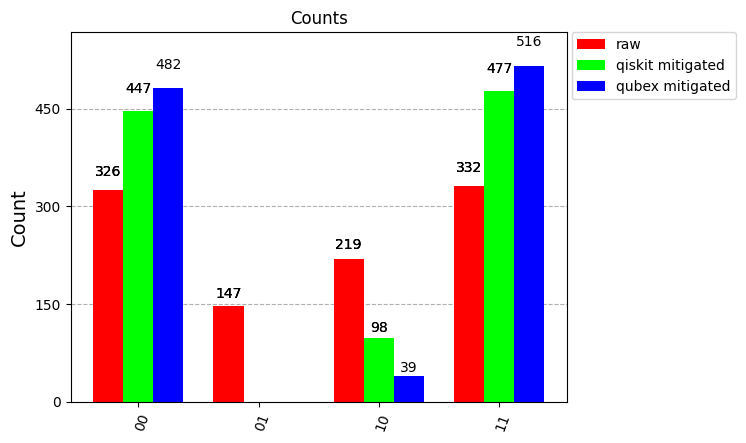

In [36]:
from qiskit.visualization import plot_histogram
%matplotlib inline
plot_histogram([raw_counts, qiskit_mitigated_counts,qubex_mitigated_counts], legend=['raw', 'qiskit mitigated', 'qubex mitigated'], title='Counts', color=['#FF0000', '#00FF00', '#0000FF'])

In [47]:
backend._experiment.calib_note

{
    "rabi_params": {
        "Q09": {
            "target": "Q09",
            "frequency": 0.012550698820288666,
            "amplitude": 0.0002236530731577666,
            "phase": -0.024271155075118532,
            "offset": 0.0007910019488617908,
            "noise": 1.5368859749287367e-05,
            "angle": 3.9017830649998526,
            "r2": 0.9894952792051793,
            "timestamp": "2025-03-14 15:03:37"
        },
        "Q26": {
            "target": "Q26",
            "frequency": 0.011820915627867766,
            "amplitude": 0.00031597913029768993,
            "phase": 0.017797437459285914,
            "offset": 0.00024237539571380243,
            "noise": 1.6803358448669314e-05,
            "angle": 3.3952374021199088,
            "r2": 0.9948199018541399,
            "timestamp": "2025-04-08 22:06:47"
        },
        "Q23": {
            "target": "Q23",
            "frequency": 0.012568527038784534,
            "amplitude": 0.00014983328820100206,
          

In [51]:
qubex_circuit.plot()

In [9]:
import numpy as np
from qiskit.result import Counts, LocalReadoutMitigator, ProbDistribution
from qubex.experiment import Experiment
from qubex.measurement.measurement import DEFAULT_INTERVAL, DEFAULT_SHOTS
from qubex.pulse import PulseSchedule
from qubex.pulse import PulseSchedule, VirtualZ
import os
CHIP_ID = os.getenv("CHIP_ID", "64Q")
CONFGIG_DIR = os.getenv("CONFIG_DIR", "/app/qubex_config")
PARAMS_DIR = os.getenv("PARAMS_DIR", "/app/qubex_config")
CALIB_NOTE_PATH = os.getenv("CALIB_NOTE_PATH", "/app/qubex_config/calib_note.json")
qubits = ["Q00", "Q01", "Q02", "Q03"]
experiment = Experiment(
	chip_id=CHIP_ID,
	qubits=qubits,
	config_dir=CONFGIG_DIR,
	params_dir=PARAMS_DIR,
	calib_note_path=CALIB_NOTE_PATH,
)

date: 2025-04-10 11:22:55
python: 3.12.3
qubex: 1.3.1+6587937
env: /home/edge/deployments/qiqb-prod-qpu/device-gateway/.venv
config: /home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config
params: /home/edge/deployments/qiqb-prod-qpu/device-gateway/qubex_config
chip: 64Q (AIST 7th #1 (2,1))
qubits: ['Q00', 'Q01', 'Q02', 'Q03']
muxes: ['MUX00']
boxes: ['R21B', 'U15A']
R21B  : Linked up
U15A  : Linked up


In [16]:
shots=1024
for qubit in qubits:
	sx_pulse = PulseSchedule([qubit])
	sx_pulse.add(qubit, experiment.x90(qubit))
	sx_pulse.plot()
	counts = experiment.measure(
				sx_pulse,
				mode="single",
				shots=shots,
				interval=DEFAULT_INTERVAL,
	).get_counts()
	print(f"Qubit {qubit} counts: {counts}")
    

Qubit Q00 counts: {'0': 518, '1': 506}


Qubit Q01 counts: {'0': 530, '1': 494}


Qubit Q02 counts: {'0': 551, '1': 473}


Qubit Q03 counts: {'0': 501, '1': 523}


In [22]:
shots=1024
import numpy as np
pi = np.pi
qubits = ["Q00", "Q01", "Q02", "Q03"]

for qubit in qubits:
	rz_pulse = PulseSchedule([qubit])
	rz_pulse.add(qubit, VirtualZ(pi/2))
	rz_pulse.plot()
	counts = experiment.measure(
				rz_pulse,
				mode="single",
				shots=shots,
				interval=DEFAULT_INTERVAL,
	).get_counts()
	print(f"Qubit {qubit} counts: {counts}")
    

No data to plot.
Qubit Q00 counts: {'0': 816, '1': 208}
No data to plot.
Qubit Q01 counts: {'0': 792, '1': 232}
No data to plot.
Qubit Q02 counts: {'0': 783, '1': 241}
No data to plot.
Qubit Q03 counts: {'0': 856, '1': 168}


In [89]:
cnot_pulse= PulseSchedule(["Q00", "Q01","Q00-Q01"])
cnot_pulse.call(experiment.cx("Q00","Q01"))
cnot_pulse.plot()

In [17]:
pair = [
	["Q00", "Q01", "Q00-Q01"],
	["Q00", "Q02", "Q00-Q02"],
	["Q03", "Q01", "Q03-Q01"],
	["Q03", "Q02", "Q03-Q02"],
]
shots=1024
for qubits in pair:
	cnot_pulse = PulseSchedule(qubits)
	cnot_pulse.call(experiment.cx(qubits[0], qubits[1]))
	cnot_pulse.plot()
	counts = experiment.measure(
				sx_pulse,
				mode="single",
				shots=shots,
				interval=DEFAULT_INTERVAL,
	).get_counts()
	print(f"Qubit {qubits} counts: {counts}")

Qubit ['Q00', 'Q01', 'Q00-Q01'] counts: {'0': 536, '1': 488}


Qubit ['Q00', 'Q02', 'Q00-Q02'] counts: {'0': 548, '1': 476}


Qubit ['Q03', 'Q01', 'Q03-Q01'] counts: {'0': 540, '1': 484}


Qubit ['Q03', 'Q02', 'Q03-Q02'] counts: {'0': 534, '1': 490}
